# Assignment 4-1

## Test the distribution of ages for both genders

## Data Used: 2015-07 citibike data

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
import os
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = open(os.getenv('PUI2015')+'/HW4/201507-citibike-tripdata.csv', 'r')
myCsv = pd.read_csv(file, delimiter=',')
myCsv.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [3]:
# I will analyze only the subscribers data following the assignment 1 example because
# this subgroup of data is more regular than the customer subgroup.
myCsv['edadM'] = 2015-myCsv['birth year'][(myCsv['usertype'] == 'Subscriber') & (myCsv['gender'] == 1)]
myCsv['edadF'] = 2015-myCsv['birth year'][(myCsv['usertype'] == 'Subscriber') & (myCsv['gender'] == 2)]
myData = pd.DataFrame()
myData['edadM'] = myCsv['edadM']
myData['edadF'] = myCsv['edadF']

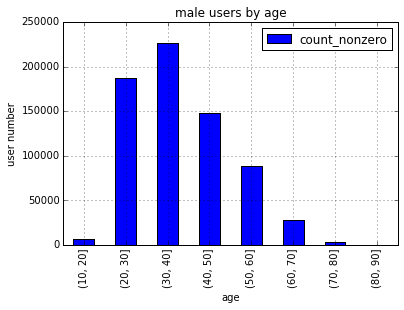

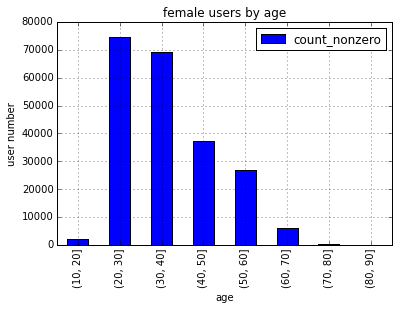

In [4]:
# create bins
bins = np.arange(10,99,10)
# draw the histogram
myData.edadM.groupby(pd.cut(myData.edadM, bins)).agg([count_nonzero]).plot(kind='bar')
pl.title('male users by age')
pl.xlabel('age')
pl.ylabel('user number')
pl.grid()
myData.edadF.groupby(pd.cut(myData.edadF, bins)).agg([count_nonzero]).plot(kind='bar')
pl.title('female users by age')
pl.xlabel('age')
pl.ylabel('user number')
pl.grid()

          count_nonzero
edadM                  
(10, 20]       0.000753
(20, 30]       0.072901
(30, 40]       0.063428
(40, 50]       0.020371
(50, 60]       0.014432
(60, 70]       0.002502
(70, 80]       0.000320
(80, 90]       0.000000


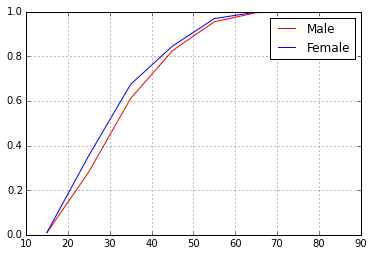

In [5]:
#count sum
#df.ageF[~np.isnan(df.ageF)]
csM = myData.edadM[~np.isnan(myData.edadM)].groupby(pd.cut(myData.edadM[~np.isnan(myData.edadM)], bins)).agg([count_nonzero]).cumsum()
csF = myData.edadF[~np.isnan(myData.edadF)].groupby(pd.cut(myData.edadF[~np.isnan(myData.edadF)], bins)).agg([count_nonzero]).cumsum()
print np.abs(csM/csM.max() - csF/csF.max())
pl.plot(bins[:-1]+5, csM/csM.max(), label='Male', color='r')
pl.plot(bins[:-1]+5, csF/csF.max(), label='Female', color='blue')
pl.grid()
pl.legend()

## According to the visualization of cdf, the distributions look similar. Let's check it with the statistics. First let's choose a sample size of 1000 riders.

In [6]:
import scipy.stats
myseed = np.random.seed(20151005)
# make an array with only the numbers I'm intereted in.
ageM = np.array(myData.edadM[~np.isnan(myData.edadM)])
# remember to turn off the replace option to make sure
# no sample is chosen twice
myseed
ageM = np.random.choice(ageM, size=5000, replace=False)
ageF = np.array(myData.edadF[~np.isnan(myData.edadF)])
myseed
ageF = np.random.choice(ageF, size=5000, replace=False)

## K-S test

In [7]:
Dks, pks = scipy.stats.ks_2samp(ageM, ageF)
numM = len(ageM)
numF = len(ageF)
print 'Dks:', Dks
print 'No. male:',numM
print 'No. Female:',numF
print 'p-value:', pks

Dks: 0.0842
No. male: 5000
No. Female: 5000
p-value: 6.77220089893e-16


## KS statistic $D_kS$ = 0.0842. The p-value is almost 0.0 . Assume our $\alpha$ is 0.05, its corresponding critical value c($\alpha$) is 1.36. 

## calculate $\sqrt (n_m+n_f)/((n_m)*(n_f))$

In [8]:
myW = np.sqrt((numM+numF+0.0)/(numM*numF))
print myW
print myW*1.36

0.02
0.0272


## Since $D_kS$ > 0.027 , we reject the null hypothesis that the two samples are drawn from the same distribution. The very low p-value also indicate the same thing.

## But head up here: since the preset function is comparing the two samples with an ideal model of normal distribution with mean 0 and sd 1. Since these two samples have different values of mean and sd, it makes sense that null hypothesis that the two samples come from a distribution similar as the normal distribution with mean 0 and sd 1should be rejected.

## For Pearson's test for correlation:

In [9]:
rmf, ppear = scipy.stats.pearsonr(ageM, ageF)
print 'Rmf =', rmf
print 'ppear =', ppear

Rmf = -0.016075244277
ppear = 0.255755461249


## According to the Pearson test, there is almost no correlation between the age of males and the age of females in the sample. The high p-value indicates there is a high chance that 

## For Spearman test:

In [10]:
myV, pspear = scipy.stats.spearmanr(ageM, ageF)
print myV, pspear

-0.0186380170562 0.187606854986


## According to the Spearman test, the correlation coefficient is a very small negative number, meaning there is almost no linear correlation for the samples. The high p-value indicates it's quite possible to have this kind of correlation coefficient for two samplings by chance.

# Let's do it for the travel time now

In [11]:
# convert the series objects to datetime objects:
myCsv['tiempo'] = pd.to_datetime(myCsv['starttime'])
# divide the file into day time and night time according to the hour (from 06:00 to 18:00 day,
# the rest night)
myCsv['timeDay'] = myCsv['tiempo'].dt.hour[(myCsv.tiempo.dt.hour>6)&(myCsv.tiempo.dt.hour<=18)]
myCsv['timeNight'] = myCsv['tiempo'].dt.hour[(myCsv.tiempo.dt.hour<=6) | (myCsv.tiempo.dt.hour>18)]

In [34]:
# delete the NaN and save the pd Series as np Arrays
myCsv['edadD'] = 2015-myCsv['birth year'][(myCsv.usertype == 'Subscriber') & (myCsv.timeDay)]
myCsv['edadN'] = 2015-myCsv['birth year'][(myCsv.usertype == 'Subscriber') & (myCsv.timeNight)]
myDay = np.array(myCsv.edadD[~np.isnan(myCsv.edadD)])
myNight = np.array(myCsv.edadN[~np.isnan(myCsv.edadN)])

In [35]:
# sample the data
myseed
daySample = np.random.choice(myDay, size=5000, replace=False)
myseed
nightSample = np.random.choice(myNight, size=5000, replace=False)

## apply the tests: KS test first

In [36]:
Dks_time, pks_time = scipy.stats.ks_2samp(daySample, nightSample)
numD = len(myDay)
numN = len(myNight)
print 'Dks:', Dks_time
print 'No. day:',numD
print 'No. night:',numN
print 'p-value:', pks_time

Dks: 0.0952
No. day: 670870
No. night: 225182
p-value: 3.34637499527e-20


## Again, these two distributions don't come from the same model distribution (specifically, gaussian(0,1) ).

## Pearson's test

In [37]:
rTime, pTime = scipy.stats.pearsonr(daySample, nightSample)
print 'rTime =', rTime
print 'pTime =', pTime

rTime = -0.00254523584405
pTime = 0.857207016654


## We can say that there is almost no correlation between the day riders age and the night riders age

In [38]:
vTime, pTimeS = scipy.stats.spearmanr(daySample, nightSample)
print vTime, pTimeS

-0.0109293744623 0.439727575898


## Again, no correlation between these two groups